# Preparation

In [1]:
!pip install tensorflow_datasets==4.4.0

     |████████████████████████████████| 4.0 MB 12.0 MB/s 
     |████████████████████████████████| 48 kB 7.9 MB/s 
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21493 sha256=d944ede151820eef4f043dd425137275541922b254f925a5a7f8887cc9278519
  Stored in directory: /root/.cache/pip/wheels/29/93/c6/762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
Successfully built promise
ERROR: tensorflow-metadata 1.5.0 has requirement absl-py<0.13,>=0.9, but you'll have absl-py 0.15.0 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [18]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In this quest, you will work with the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). It contains 60000 32x32 colour images in 10 classes, with 6000 images per class. Your task will be predicting image classes.


# Tasks

Normalize pixel values of both train and test images to the values in the range between 0 and 1

In [5]:
# Trivial normalization
print(f"BEFORE:")
print(f"Maximum value (train) = {train_images.max()}")
print(f"Maximum value (test)  = {test_images.max()}")

train_images = train_images / 255
test_images = test_images / 255

print(f"AFTER:")
print(f"Maximum value (train) = {train_images.max()}")
print(f"Maximum value (test)  = {test_images.max()}")


BEFORE:
Maximum value (train) = 255
Maximum value (test)  = 255
AFTER:
Maximum value (train) = 1.0
Maximum value (test)  = 1.0


In [6]:
train_images.max()

1.0

In [7]:
train_images.shape

(50000, 32, 32, 3)

Build a sequential model with the following architecture:

conv2d - (None, 30, 30, 32)  
_________________________________________________________________
max_pooling2d - (None, 15, 15, 32)        
_________________________________________________________________
conv2d - (None, 13, 13, 64)
_________________________________________________________________
max_pooling2d - (None, 6, 6, 64)        
_________________________________________________________________
conv2d - (None, 4, 4, 128) 
_________________________________________________________________
flatten - (None, 2048)       
_________________________________________________________________
dense - (None, 64)    
_________________________________________________________________
dense - (None, 10)       


In [8]:
# Defining the model using a function

def new_model(**kwargs):

    inputs          = tf.keras.Input(shape=(32, 32, 3))
    conv2d_1        = tf.keras.layers.Conv2D(32, (3,3), activation="relu")(inputs)
    max_pooling2d_2 = tf.keras.layers.MaxPooling2D()(conv2d_1)
    conv2d_3        = tf.keras.layers.Conv2D(64, (3,3), activation="relu")(max_pooling2d_2)
    max_pooling2d_4 = tf.keras.layers.MaxPooling2D(padding="valid")(conv2d_3)
    conv2d_5        = tf.keras.layers.Conv2D(128, (3,3), activation="relu")(max_pooling2d_4)
    flatten_6       = tf.keras.layers.Flatten()(conv2d_5)
    dense_7         = tf.keras.layers.Dense(64, activation="relu")(flatten_6)
    outputs         = tf.keras.layers.Dense(10, activation="softmax")(dense_7)

    model           = tf.keras.Model(inputs=inputs, outputs=outputs, **kwargs)

    model.summary()

    return model


In [9]:
# Our first CNN model
m1 = new_model(name="CNN")

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0       

Compile the model using Adam optimizer, sparse categorical crossentropy as loss function, and choose an appropriate metric for classification. Use 10 epochs to train the model.

In [10]:
# Compile code
optimizer = tf.keras.optimizers.Adam()
loss      = tf.keras.losses.SparseCategoricalCrossentropy()
metrics   = ["sparse_categorical_accuracy"]

m1.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)


In [11]:
# Fit model
epochs=10
validation_split=0.2
shuffle=True

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=validation_split)

train_generator = datagen.flow(train_images, y=train_labels)
test_generator  = datagen.flow(test_images, y=test_labels)

h1 = m1.fit(
        train_generator,
        steps_per_epoch = len(train_images) // 32,
        epochs=epochs
    )

Epoch 1/10
1562/1562 [==============================] - 67s 42ms/step - loss: 1.7598 - sparse_categorical_accuracy: 0.3458
Epoch 2/10
1562/1562 [==============================] - 65s 42ms/step - loss: 1.1489 - sparse_categorical_accuracy: 0.5902
Epoch 3/10
1562/1562 [==============================] - 65s 41ms/step - loss: 0.9602 - sparse_categorical_accuracy: 0.6633
Epoch 4/10
1562/1562 [==============================] - 73s 47ms/step - loss: 0.8345 - sparse_categorical_accuracy: 0.7082
Epoch 5/10
1562/1562 [==============================] - 65s 42ms/step - loss: 0.7543 - sparse_categorical_accuracy: 0.7353
Epoch 6/10
1562/1562 [==============================] - 71s 46ms/step - loss: 0.6917 - sparse_categorical_accuracy: 0.7590
Epoch 7/10
1562/1562 [==============================] - 70s 45ms/step - loss: 0.6335 - sparse_categorical_accuracy: 0.7772
Epoch 8/10
1562/1562 [==============================] - 64s 41ms/step - loss: 0.5885 - sparse_categorical_accuracy: 0.7936
Epoch 9/10
1562/

In [24]:
# This function will retrieve and plot all observed model performance metrics

def show_history(s, suptitle="", scale = "linear"):
    
    # Automatically retrieve list of all metrics from history
    metrics = list(s.history.keys())

    # Calculate amount of metrics
    nrows = len(metrics)

    # Set figure size to 12 x N*5 (where N is number of metrics [nrows])
    fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(12, 5 * nrows))

    fig.suptitle(suptitle)

    index = -1

    for metric in metrics:
        index+=1

        axs[index].plot(s.history[metric], label=metric)
        #axs[index].plot(s.history["val_"+metric], label="val_"+metric)
        axs[index].set_yscale(scale)
        axs[index].legend()
        axs[index].grid(b=True, which="major", axis="y")
        axs[index].set_title("Observed "+metric)
    
    plt.show()
    plt.close()

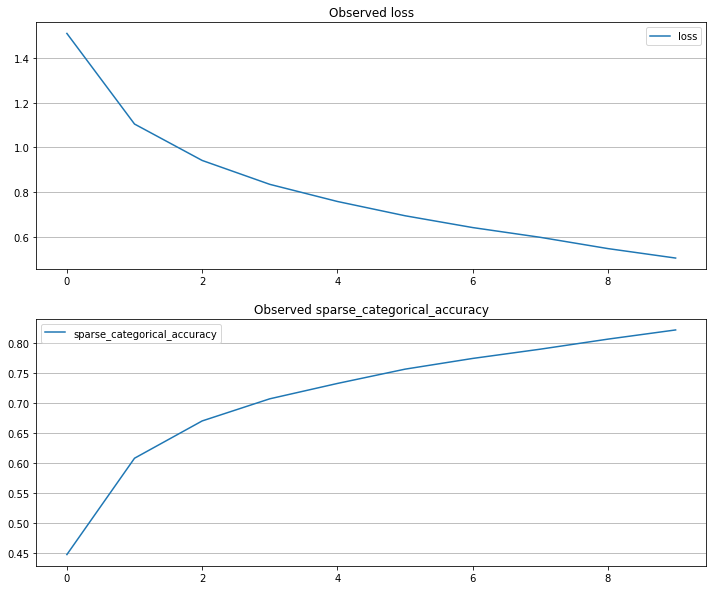

In [25]:
show_history(h1)

Evaluate the model on test data to get the loss and accuracy metrics

In [17]:
# Evaluation code

test_generator  = datagen.flow(test_images, y=test_labels)

m1.evaluate(
    x=test_generator,
    batch_size=len(test_labels)
)


313/313 [==============================] - 4s 13ms/step - loss: 0.9121 - sparse_categorical_accuracy: 0.7138


[0.9120549559593201, 0.7138000130653381]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87989bd7-7a25-4e61-b3c0-cb24ea7ca1f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>